# 코딩과논리적사고 최종과제 설명서
1. 이 과제는 웹 크롤링을 통해 데이터를 수집하고,
2. 수집한 데이터를 Pandas로 처리 및 분석하며,
3. 이를 바탕으로 통계적 인사이트를 도출하고
4. 시각화를 수행하는 정으로 구성되어 있음
5. 최종적으로, 분석 결과를 CSV 파일로 저장함
6. 모든 결과를 코랩위에 출력한후에 e-campus에 제출함
7. 출제 마감일은 12/21일(일요일, 오후 11시59분)
8. e-campus에 제출안되면 doohwangme@gmail.com으로 제출하시오.


### 과제 목표
* Yes24 스테디셀러 웹 페이지에서 도서 데이터를 크롤링하여 수집
* 책 제목, 저자, 출판사, 출간 연도, 판매지수, 리뷰 점수
* 수집한 데이터를 Pandas 데이터프레임에 저장
* 데이터를 정제 및 처리하여 분석에 적합한 형태로 변환
* 데이터를 탐색하고 통계적 분석을 수행
* 결과를 CSV 파일로 저장



### 코랩작업환경을 내드라이브와 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 그래프 한글 깨짐 현상 방지: 안되면 run time 재시작 할것
* Google Colab에서 한글 폰트를 설치하고 사용할 수 있도록 설정
* 상위 메뉴의 "런타임" > "세션 다시 시작"

In [2]:
### Google Colab에서 한글 폰트를 설치하고 사용할 수 있도록 설정

!sudo apt-get install -y fonts-nanum # 나눔폰트 설치
!sudo fc-cache -fv # 폰트 캐시 새로 코침
!rm ~/.cache/matplotlib -rf # Matplotlib의 캐시 초기화

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,505 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117528 files and direc

Text(0.5, 1.0, '한글 보임')

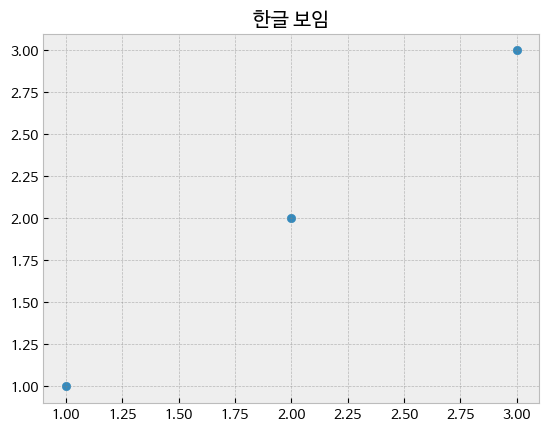

In [1]:
### 아래 셀 실행 후 한글이 안보이면 런타임 다시 시작(보통 처음엔 잘 안됌)
# "런타임" > "세션 다시 시작"
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

### 그래프 기본 설정
plt.style.use('bmh')
# ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale','Solarize_Light2', 'tableau-colorblind10', '_classic_test']
plt.grid(True, axis='both', color='grey', alpha=0.5, linestyle='--')   # axis='y'
plt.rc('font', family='NanumBarunGothic')

plt.scatter([1,2,3],[1,2,3])    # plt 한글 확인
plt.title('한글 보임')

### 필수 라이브러리 설치

1. requests: 웹 페이지 요청을 보내고 응답을 받기 위해 사용
2.  BeautifulSoup (bs4): HTML 문서를 파싱하여 원하는 데이터를 추출
3. pandas: 데이터를 처리하고 구조화하여 관리
4. matplotlib: 데이터를 시각화하는 데 사용
5. numpy: 데이터 분석 및 시각화에서 숫자 계산


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import numpy as np

### 과제를 위한 코드 작성


웹 크롤링 결과(데이터프레임):
                                책 제목            저자(+엮은이)           출판사  \
0                             소년이 온다                한강 저            창비   
1                       어른의 행복은 조용하다                태수 저        페이지2북스   
2                                 모순               양귀자 저            쓰다   
3                           초역 부처의 말    코이케 류노스케 저/박재현 역        포레스트북스   
4            하루 한 장 나의 어휘력을 위한 필사 노트               유선경 저        위즈덤하우스   
5   ETS 토익 정기시험 기출문제집 1000 Vol. 4 RC               ETS 저     YBM(와이비엠)   
6   ETS 토익 정기시험 기출문제집 1000 Vol. 4 LC               ETS 저     YBM(와이비엠)   
7                              채식주의자                한강 저            창비   
8                해커스 토익 기출 VOCA (보카)         David Cho 저      해커스어학연구소   
9                           작별하지 않는다                한강 저          문학동네   
10                                급류               정대건 저           민음사   
11              행동하지 않으면 인생은 바뀌지 않는다   브라이언 트레이시 저/정지현 역          현대지성   
12                 

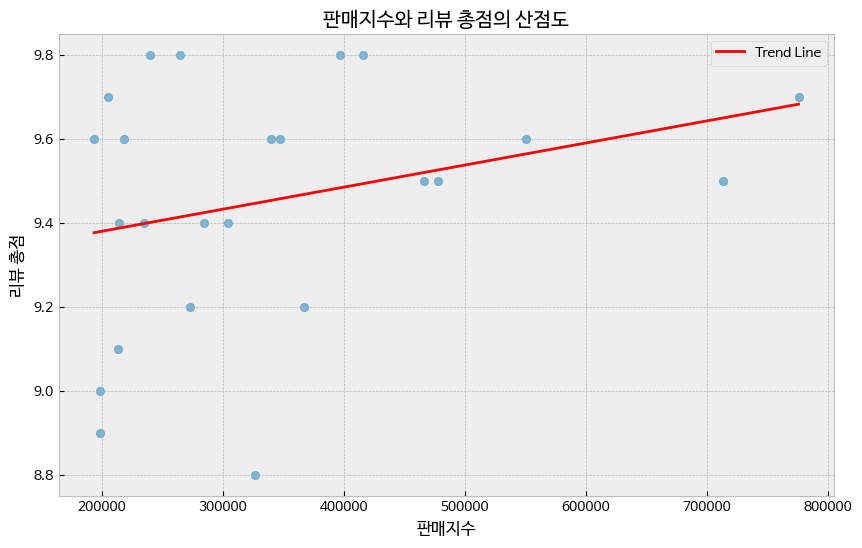

In [18]:
# 1. 웹 크롤링: 페이지 요청 및 HTML 파싱

URL = 'https://www.yes24.com/product/category/steadyseller?categoryNumber=001' # yes24 스테디셀러 웹페이지 URL 지정

response = requests.get(URL)
soup = BeautifulSoup(response.text,'html.parser')

# 2. 2. 원하는 데이터 추출": 스테디셀러 책 정보가 담긴 리스트를 찾기
books = soup.find_all('div', class_ = 'itemUnit')

# 3. 데이터 정리 및 리스트화: 빈 리스트 new_data를 초기화
# 각 책에 대한 정보를 추출하여 new_data 리스트에 저장합니다.
# 이 리스트에는 책 제목, 저자, 출판사, 출간 연도, 판매지수, 리뷰 점수 등의 데이터가 포함
new_data = []
for book in books:
    #책 제목
    title = book.find('a', class_='gd_name').text.strip()
    #저자(+엮은이)
    author = book.find('span', class_='authPub info_auth').text.strip()
    #출판사
    pub = book.find('span',class_='authPub info_pub').text.strip()
    #출간년도
    pub_year = book.find('span', class_='authPub info_date').text.strip()
    #판매지수
    sale_index = book.find('span', class_='saleNum').text.strip() if book.find('span', class_='saleNum') else "0"  # 판매지수가 없는 책은 0으로 처리함.
    #리뷰 총점
    review = book.find('span', class_='rating_grade').find('em').text.strip() if book.find('span', class_='rating_grade') else "0.0" # 리뷰 총점이 없는 책은 0.0 으로 처리함.

    new_data.append([title,author,pub,pub_year,sale_index,review])

# 4. Pandas 데이터프레임 생성
df = pd.DataFrame(new_data,columns = ['책 제목','저자(+엮은이)','출판사','출간년도','판매지수','리뷰 총점'])
print("\n웹 크롤링 결과(데이터프레임):")
print(df)

# 3. 데이터 정제: 출간년도', '판매지수', '리뷰 총점' 데이터를 정리하여 숫자로 변환
df['출간년도'] = df['출간년도'].str.split('년').str[0].astype(int)   # df의 '출간년도' 열의 출간년도 문자열을 '년'으로 분리하고 숫자로 변환하는 코드
df['판매지수'] = df['판매지수'].str.replace('판매지수', '').str.replace(',', '').astype(int)  # df의 '판매지수' 열의 판매지수라는 불필요한 문자와 쉼표를 제거하고 값을 정수형(int)으로 변환하는 코드.
df['리뷰 총점'] = df['리뷰 총점'].astype(float) # df의 '리뷰 총점' 열의 값을 실수형(float)으로 변환하는 코드

# 4. 데이터 탐색: 데이터프레임 구조(.info()) 및 요약 통계(.describe())를 확인
print("\n데이터프레임 정보:")
print(df.info())

print("\n데이터프레임 기술통계:")
print(df.describe().round(2))

# 5. 리뷰 총점이 높은 상위 5개 도서를 선정하여 추출하고 출력
top_5_reviews = df.sort_values(by='리뷰 총점', ascending=False).head(5)['책 제목']
print("\n리뷰 총점 상위 5개 도서:")
print(top_5_reviews)

# 6. 통계 분석 및 시각화
# 판매지수와 리뷰 총점 간의 평균, 표준편차를 계산
# 두 변수 간 상관관계를 분석
print("\n판매지수의 평균과 표준편차:")
print('평균:',df['판매지수'].mean())
print('표준편차',df['판매지수'].std())

print("\n리뷰 총점의 평균과 표준편차:")
print('평균:',df['리뷰 총점'].mean())
print('표준편차',df['리뷰 총점'].std())

print("\n판매지수와 리뷰 총점의 상관관계:")
correlation = df[['판매지수', '리뷰 총점']].corr().round(2)
print(correlation)

# 7. 시각화
# 판매지수와 리뷰 총점 간의 관계를 산점도로 표현하고, 추세선을 추가
plt.figure(figsize=(10, 6))
plt.scatter(df['판매지수'], df['리뷰 총점'], alpha=0.6)
m, b = np.polyfit(df['판매지수'], df['리뷰 총점'], 1)
plt.plot(df['판매지수'], m * df['판매지수'] + b, color="red", label="Trend Line")
plt.legend()
plt.title('판매지수와 리뷰 총점의 산점도')
plt.xlabel('판매지수')
plt.ylabel('리뷰 총점')
plt.show()

### mydrive의 mypython 폴더안의 myweb 폴더안에 다음 두 파일을 저장
1. 정제된 데이터를 CSV 파일로 저장
2. 산점도를 그림파일로 저장

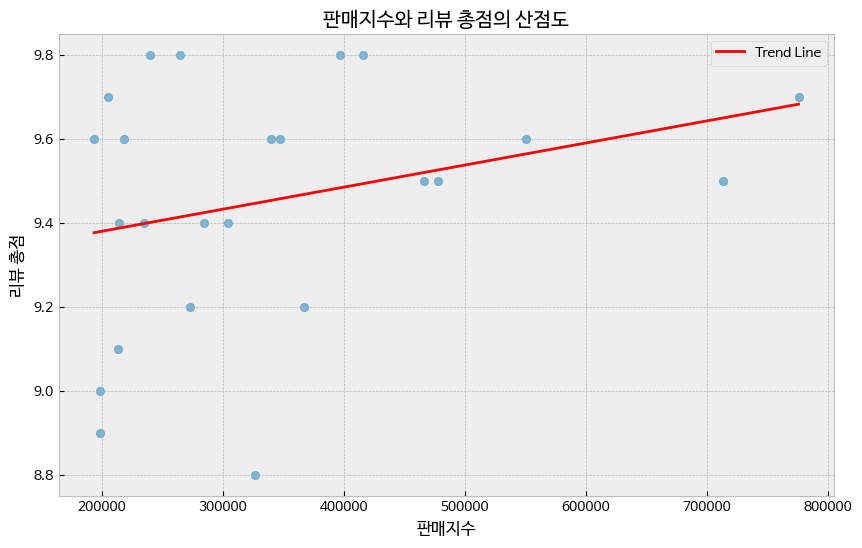

In [19]:
df.to_csv("/content/drive/MyDrive/mypython/myweb/steady_seller.csv", index=False, encoding="utf-8-sig")

plt.figure(figsize=(10, 6))
plt.scatter(df['판매지수'], df['리뷰 총점'], alpha=0.6)
m, b = np.polyfit(df['판매지수'], df['리뷰 총점'], 1)
plt.plot(df['판매지수'], m * df['판매지수'] + b, color="red", label="Trend Line")
plt.legend()
plt.title('판매지수와 리뷰 총점의 산점도')
plt.xlabel('판매지수')
plt.ylabel('리뷰 총점')
plt.savefig('/content/drive/MyDrive/mypython/myweb/스테디셀러_판매지수_리뷰총점_산점도.png')
